In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0.0, 10.1, 0.5)

*** 
$$ y = 5x + 2 $$

In [3]:
y = 5.0 * x + 2.0

In [4]:
y

array([ 2. ,  4.5,  7. ,  9.5, 12. , 14.5, 17. , 19.5, 22. , 24.5, 27. ,
       29.5, 32. , 34.5, 37. , 39.5, 42. , 44.5, 47. , 49.5, 52. ])

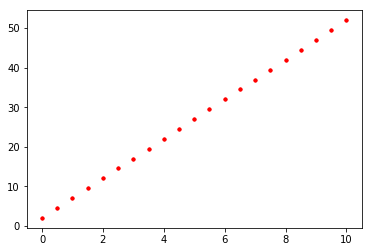

In [6]:
plt.plot(x, y, 'r.')
plt.show()

In [7]:
np.polyfit(x, y, 1)

array([5., 2.])

***
$$ y = 3x - 1 + e $$

In [12]:
# create a y with noise
y = 3.0 * x -1.0 + np.random.normal(0.0, 1.0, len(x))

In [13]:
# Do regression on the x and y using numpy
np.polyfit(x, y, 1)

array([ 3.02575462, -0.95029234])

In [18]:
# create variables with those values
m, c = np.polyfit(x, y, 1)
# Have a look at m and c
m, c

(3.0257546223502207, -0.9502923448769742)

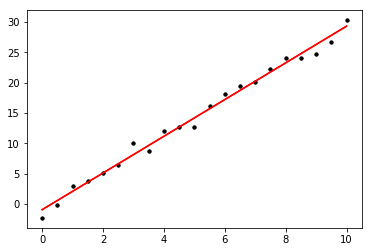

In [17]:
# plot x and y and the regression line in red
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')
plt.show()

In [21]:
# Calculate mean x and mean y
x_avg = np.mean(x)
y_avg = np.mean(y)
# subtract means from x and y
x_zero = x - x_avg
y_zero = y - y_avg

# Dot product of mean-adjusted x and y divided by dot product of mean adjusted z with itself
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
#Subtract m times average x from average y
c = y_avg - m * x_avg

#Lets have a look - same values as above
m, c

(3.025754622350221, -0.9502923448769796)

In [22]:
# create y from a polynomial in x
y = 2.0 * x *x + 5.0 * x + 1.0 + np.random.normal(0.0, 1.0, len(x))

In [23]:
y

array([  0.72255713,   4.87110576,   6.37771639,  11.47680089,
        19.52195604,  24.87508023,  34.35084983,  43.92446491,
        53.83853466,  63.172152  ,  76.38068021,  88.65789132,
       103.4072974 , 119.27492747, 133.85700962, 150.29685903,
       169.68215577, 188.95415383, 207.78612528, 228.3574499 ,
       250.53678585])

In [24]:
# Blindly try the regression - we get answers
# create variables with those values
m, c = np.polyfit(x, y, 1)
# Have a look at m and c
m, c

(25.038694831988398, -30.892400183896633)

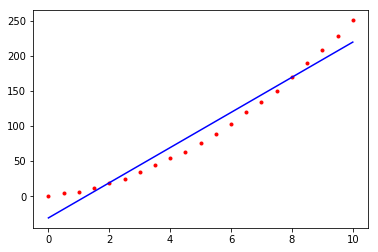

In [25]:
plt.plot(x, y, 'r.')
plt.plot(x, 25.03 * x - 30.89, 'b-')
plt.show()

Note how the points below the line are bunched in a specific x range.
There is a ptern to which points are below the line and which points are above.
If asked to give a description you could say that between x 2 and x8 all points are below the line

## Multi-linear regression
Lets' try multi-linear regression using sklearn

In [26]:
# Import linear_model from sklearn
import sklearn.linear_model as lm

In [28]:
# Create a linear regression model instance
m = lm.LinearRegression()

In [29]:
#Let's use pandas to read a csv file and organise our data
import pandas as pd

In [30]:
# Read the iris csv from online
df = pd.read_csv('https://datahub.io/machine-learning/iris/r/iris.csv')

*** petalwidth = t(sepallength) + u(sepalwidth) + v(petallength) + c (i.e. the intercept) ***

In [32]:
#Let's pretend we want to do linear regression on these variables to predict petal width
x = df[['sepallength', 'sepalwidth', 'petallength']]

In [33]:
# Heres petal width
y = df['petalwidth']

In [34]:
# Ask our model to fit the data
m.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
# Here's our interceot
m.intercept_

-0.248723586024455

The best c value is -0.24872

In [37]:
#Heres our coefficients, in order
m.coef_

array([-0.21027133,  0.22877721,  0.52608818])

 The best t value is -0.2487, the best u value is 0.22877 and the best v value is 0.5260

In [38]:
# See how good our fit is
m.score(x, y)

0.9380481344518986

In [42]:
# Calculate the score by hand
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['sepallength'] + u * x['sepalwidth'] + v * x['petallength'] + c))**2).sum()
v = ((y - y.mean())**2).sum()
1 - (u/v)

0.9380481344518986

## Usings statsmodels

In [43]:
import statsmodels.api as sm

#Tell statsmodels to include an intercept
xwithc = sm.add_constant(x)

# Create a model
msm = sm.OLS(y, xwithc)
# Fit the data
rsm = msm.fit()
#Print a summary
print(rsm.summary())

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:             petalwidth   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           6.20e-88
Time:                        14:25:53   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2487      0.178     -1.396      